# CS4035 - Cyber Data Analytics
## Lab 1 - Fraud data

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 1 contains 5 main questions, including the bonus. Write the code or explanation below each sub question. For the explanations, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) The libraries needed to run this file. Except for numpy, scikit-learn, pandas, matplotlib

Your peers should be able to use the readme section for instructions and be able to run this file. 

Make sure to keep your answers concise. Maximum number of words is 1000, which you can count with the code below. (You can add around 600 words since we start at around 400).

In [17]:
# If this cell does not work try running `pip install nbformat`

import io
from IPython import nbformat

nb = nbformat.read("Lab1.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 368


## Group Number :

## Student 1 
### Name : Yuan Tian
### ID :

## Student 2
### Name : Raphael Frühwirth
### ID : 5897297

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

## 1. Visualization task – 1 A4

### 1a. Plot visulations 

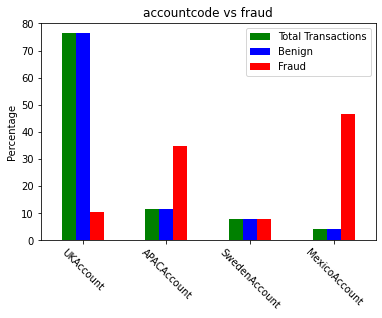

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv")

index = "accountcode"
top = 10 #len(df["issuercountrycode"].unique())
transactions = df[index].value_counts()[:top]
frauds = df.groupby(index)['label'].sum()

benign = df.loc[df['label'] == 0, 'label'] = 2
benign = df.loc[df['label'] == 1, 'label'] = 0
benign = df.loc[df['label'] == 0, 'label'] = 1
benign = df.groupby(index)['label'].sum()

frauds = (100. * frauds / frauds.sum()).round(1)
transactions = (100. * transactions / transactions.sum()).round(1)
benign = (100. * benign/benign.sum()).round(1)

df_viz = pd.DataFrame({'Total Transactions': transactions, "Benign": benign, "Fraud": frauds}, index=df[index].unique()[:top])
ax = df_viz.plot.bar(rot=0, color=["Green", "Blue", "Red"])
plt.ylabel("Percentage")
plt.title(f"{index} vs fraud")
plt.xticks(rotation=-45)
plt.savefig(f"figures/figure_{index}.png", transparent=False, format="png", facecolor="white")


<AxesSubplot:title={'center':'Class Distribution'}, xlabel='label'>

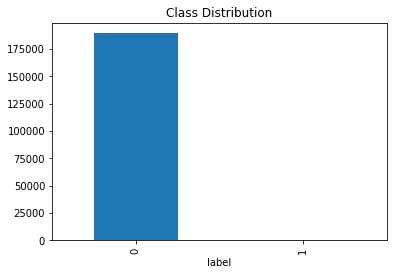

In [7]:
import pandas as pd 

train_data = pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv")
test_data = pd.read_csv("cda-lab-1-credit-card-fraud/test_data.csv")

#create pivot table to visualize the class distribution
train_data_pivot = pd.pivot_table(train_data, index="label", aggfunc="size")
train_data_pivot.plot(kind="bar", title="Class Distribution")


Index(['MX', 'AU', 'GB', 'SE', 'NZ', 'FI'], dtype='object', name='issuercountrycode')


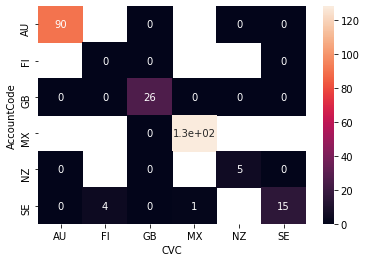

In [6]:
import seaborn as sns

df = pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv")
top = 6

# df.loc[df['label'] == 0, 'label'] = 2  
# df.loc[df['label'] == 1, 'label'] = 0
# df.loc[df['label'] == 0, 'label'] = 1

popular_countries = df.groupby("issuercountrycode")["label"].sum().sort_values(ascending=False)
print(popular_countries[:top].index)

df_filtered = df[(df["issuercountrycode"].isin(popular_countries[:top].index) & df["shoppercountrycode"].isin(popular_countries[:top].index))]

x = df_filtered["issuercountrycode"]
y = df_filtered["shoppercountrycode"]
label = df_filtered["label"]

df_new = pd.DataFrame({'AccountCode': y, 'CVC': x, 'Score':label})

df_heatmap = df_new.pivot_table(values='Score', index='AccountCode', columns='CVC', aggfunc=sum)
sns.heatmap(df_heatmap, annot=True)
plt.show()


In [19]:
def process_df(df):
  exchange_rates = {
      'USD': 1.0,
      'GBP': 1.42, # sample exchange rate
      'AUD': 0.73,
    'SEK': 0.12,
    'MXN': 0.049,
  'NZD': 0.65
  }

  # Define a function to normalize amount to USD
  def normalize_amount(row):
      currency_code = row['currencycode']
      amount = row['amount']
      exchange_rate = exchange_rates[currency_code]
      return amount * exchange_rate

  # Apply the function to the amount column
  df['amount'] = df.apply(normalize_amount, axis=1)
  df["txvariantcode"].replace(df["txvariantcode"].unique(), range(len(df["txvariantcode"].unique())),inplace=True)
  df["issuercountrycode"].replace(df["issuercountrycode"].unique(), range(len(df["issuercountrycode"].unique())),inplace=True)
  df["currencycode"].replace(df["currencycode"].unique(), range(len(df["currencycode"].unique())),inplace=True)
  df["shoppercountrycode"].replace(df["shoppercountrycode"].unique(), range(len(df["shoppercountrycode"].unique())),inplace=True)
  df["shopperinteraction"].replace(df["shopperinteraction"].unique(), range(len(df["shopperinteraction"].unique())),inplace=True)
  df["cardverificationcodesupplied"].replace(df["cardverificationcodesupplied"].unique(), range(len(df["cardverificationcodesupplied"].unique())),inplace=True)
  df["accountcode"].replace(df["accountcode"].unique(), range(len(df["accountcode"].unique())),inplace=True)
  return df

#correlation_matrix = df.corr()
#sns.heatmap(correlation_matrix)

<AxesSubplot:>

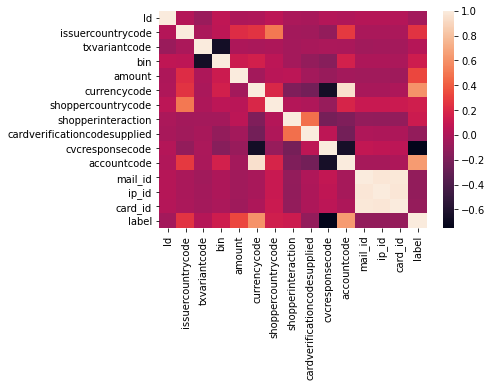

In [92]:
num = len(df[df["label"]==1])

non_fraud = df[df["label"] == 0].sample(num, random_state=12)
fraud = df[df["label"] == 1].sample(num, random_state=12)

non_fraud["card_id"].replace(non_fraud["card_id"].unique(), range(len(non_fraud["card_id"].unique())),inplace=True)
non_fraud["ip_id"].replace(non_fraud["ip_id"].unique(), range(len(non_fraud["ip_id"].unique())),inplace=True)
non_fraud["mail_id"].replace(non_fraud["mail_id"].unique(), range(len(non_fraud["mail_id"].unique())),inplace=True)

fraud["card_id"].replace(fraud["card_id"].unique(), range(len(fraud["card_id"].unique())),inplace=True)
fraud["ip_id"].replace(fraud["ip_id"].unique(), range(len(fraud["ip_id"].unique())),inplace=True)
fraud["mail_id"].replace(fraud["mail_id"].unique(), range(len(fraud["mail_id"].unique())),inplace=True)

corr_mat = pd.concat([non_fraud, fraud]).corr()
sns.heatmap(corr_mat)


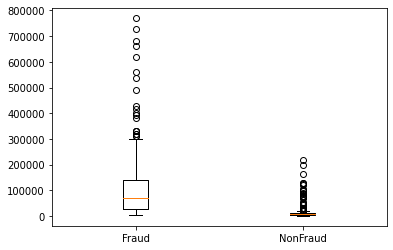

In [84]:
feature = "amount"
dic = {"Fraud": fraud[feature], "NonFraud": non_fraud[feature]}
plt.boxplot(dic.values())
plt.xticks(range(1, len(dic.keys())+1), dic.keys())
plt.show()

In [20]:
df["bin"][df["label"] == 0].value_counts()
df["bin"][df["label"] == 1].value_counts()
plt.bar()

477291.0    20
547046.0    14
552033.0    13
535316.0    12
477214.0    10
            ..
484431.0     1
455500.0     1
535318.0     1
522767.0     1
547096.0     1
Name: bin, Length: 117, dtype: int64

### 1b. Describe the visualizations and provide relavant explanations of features and relations.

## 2. Imbalance task – 1 A4 – Individual

### 2a. Print ROC curves

In [28]:
train_data = process_df(pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv")).drop(["mail_id", "ip_id", "card_id"], axis=1)

   Id  issuercountrycode  txvariantcode       bin   amount  currencycode  \
0   1                  0              0  546097.0   6390.0             0   
1   2                  0              1  557349.0   4820.9             0   
2   3                  0              0  542011.0   5530.9             0   
3   4                  0              2  465943.0  21789.9             0   
4   6                  0              2  475127.0   7234.9             0   

   shoppercountrycode  shopperinteraction  cardverificationcodesupplied  \
0                   0                   0                             0   
1                   0                   0                             0   
2                   0                   0                             0   
3                   0                   1                             1   
4                   0                   0                             0   

   cvcresponsecode  accountcode  label  
0                1            0      0  
1         

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report    
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

train, test = train_test_split(train_data, test_size=0.3, stratify=train_data["label"], random_state=12)

def test_model(classifier=LogisticRegression(), with_smote=False):
    if with_smote:
        print("Testing Model with SMOTEd data")
        X_resampled, y_resampled = SMOTE(k_neighbors=5).fit_resample(train.drop(["label"], axis=1), train["label"])
        smote_model = classifier
        smote_model.fit(X_resampled, y_resampled)
        predictions = smote_model.predict(test.drop("label", axis=1))
    else:
        print("Testing Model with regular data")
        model = classifier
        model.fit(train.drop("label", axis=1), train["label"])
        predictions = model.predict(test.drop("label", axis=1))

    tn, fp, fn, tp = confusion_matrix(test['label'], predictions).ravel()
    print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)
    print(classification_report(test["label"], predictions, zero_division=0))
    return predictions

In [71]:
def plot_roc_curve(y_test, y_pred):
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt

    #plot roc curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

Testing Model with regular data
True negatives:  56806 
False positives:  0 
False negatives:  83 
True Positives:  0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56806
           1       0.00      0.00      0.00        83

    accuracy                           1.00     56889
   macro avg       0.50      0.50      0.50     56889
weighted avg       1.00      1.00      1.00     56889



/home/raphael/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raphael/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raphael/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


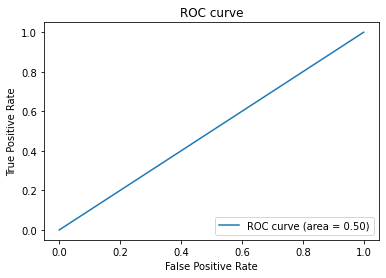

In [75]:
predictions = test_model()
plot_roc_curve(test["label"], predictions)


Testing Model with SMOTEd data


/home/raphael/.local/lib/python3.6/site-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


True negatives:  42682 
False positives:  14124 
False negatives:  42 
True Positives:  41
              precision    recall  f1-score   support

           0       1.00      0.75      0.86     56806
           1       0.00      0.49      0.01        83

    accuracy                           0.75     56889
   macro avg       0.50      0.62      0.43     56889
weighted avg       1.00      0.75      0.86     56889



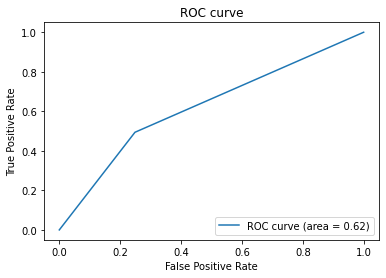

In [77]:
predictions = test_model(with_smote=True)
plot_roc_curve(test["label"], predictions)

Testing Model with regular data
True negatives:  56804 
False positives:  2 
False negatives:  83 
True Positives:  0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56806
           1       0.00      0.00      0.00        83

    accuracy                           1.00     56889
   macro avg       0.50      0.50      0.50     56889
weighted avg       1.00      1.00      1.00     56889



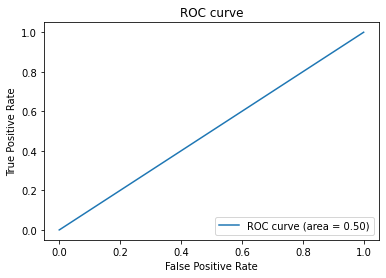

In [78]:
predictions = test_model(classifier=RandomForestClassifier() ,with_smote=False)
plot_roc_curve(test["label"], predictions)

Testing Model with SMOTEd data


/home/raphael/.local/lib/python3.6/site-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


True negatives:  56617 
False positives:  189 
False negatives:  78 
True Positives:  5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56806
           1       0.03      0.06      0.04        83

    accuracy                           1.00     56889
   macro avg       0.51      0.53      0.52     56889
weighted avg       1.00      1.00      1.00     56889



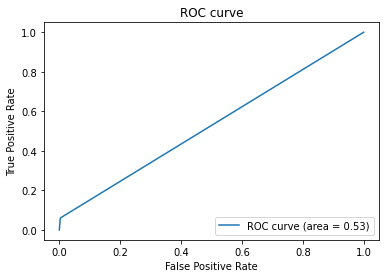

In [79]:
predictions = test_model(classifier=RandomForestClassifier(), with_smote=True)
plot_roc_curve(test["label"], predictions)

Testing Model with regular data
True negatives:  56794 
False positives:  12 
False negatives:  83 
True Positives:  0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56806
           1       0.00      0.00      0.00        83

    accuracy                           1.00     56889
   macro avg       0.50      0.50      0.50     56889
weighted avg       1.00      1.00      1.00     56889



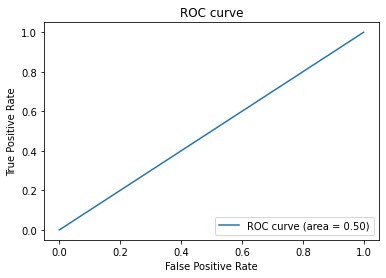

In [81]:
predictions = test_model(classifier=AdaBoostClassifier(), with_smote=False)
plot_roc_curve(test["label"], predictions)

Testing Model with SMOTEd data
True negatives:  50007 
False positives:  6799 
False negatives:  16 
True Positives:  67
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     56806
           1       0.01      0.81      0.02        83

    accuracy                           0.88     56889
   macro avg       0.50      0.84      0.48     56889
weighted avg       1.00      0.88      0.93     56889



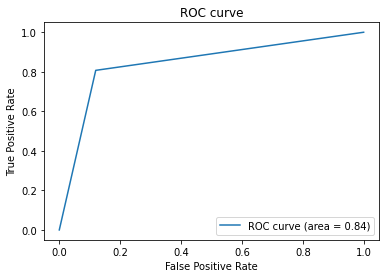

In [89]:
predictions = test_model(classifier=AdaBoostClassifier(n_estimators=50, learning_rate=.5), with_smote=True)
plot_roc_curve(test["label"], predictions)

Testing Model with regular data
True negatives:  56806 
False positives:  0 
False negatives:  83 
True Positives:  0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56806
           1       0.00      0.00      0.00        83

    accuracy                           1.00     56889
   macro avg       0.50      0.50      0.50     56889
weighted avg       1.00      1.00      1.00     56889



/home/raphael/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raphael/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raphael/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


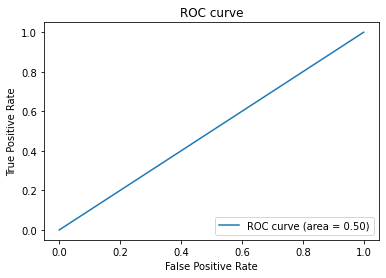

In [83]:
predictions = test_model(classifier=MLPClassifier(), with_smote=False)
plot_roc_curve(test["label"], predictions)

Testing Model with SMOTEd data
True negatives:  52496 
False positives:  4310 
False negatives:  18 
True Positives:  65
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56806
           1       0.01      0.78      0.03        83

    accuracy                           0.92     56889
   macro avg       0.51      0.85      0.49     56889
weighted avg       1.00      0.92      0.96     56889



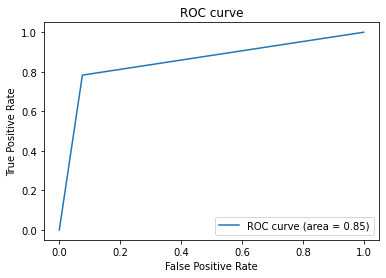

In [84]:
predictions = test_model(classifier=MLPClassifier(), with_smote=True)
plot_roc_curve(test["label"], predictions)

### 2b. Analyse the performance of the classifiers. Explain which method performs best.

### 2c. Is using SMOTE a good idea? Why (not)?

## 3. Privacy task – 1 A4 – Individual

### 3a. Print ROC curves

### 3b. Analyse the performance of the classifiers. Explain which method performs best.

### 3c. Can you explain the performance difference for the different classifiers? Is it advisable to protect people’s privacy using rank-swapping? Why (not)?

## 4. Classification task – 2 A4

### 4a. Print relevant plots and metrics with clear headings.

### 4b. Explain the applied data pre-processing steps, learning algorithms, and post-processing steps or ensemble methods. Compare the performance of the two algorithms, focusing on performance criteria that are relevant in practice, use 10-fold cross-validation.

## 5. Bonus task – 1 A4

### 5a. Provide code and report below